In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hmmlearn import hmm

In [2]:
data = pd.read_csv('gemini_BTCUSD_day1.csv')

In [3]:
data["Date"] = pd.to_datetime(data["Date"])
data.drop('Unix Timestamp', axis = 1)

,Date,High,Low,Close,Volume,Open
0,2015-10-08,245.00,0.00,243.60,34.754703,0.00
1,2015-10-09,249.97,243.60,245.51,61.587068,243.60
2,2015-10-10,246.30,244.60,246.30,30.870549,245.51
3,2015-10-11,249.50,245.96,248.98,22.747091,246.30
4,2015-10-12,248.98,245.75,245.75,71.047743,248.98
...,...,...,...,...,...,...
2128,2021-08-05,41431.18,37311.06,40250.79,3715.503945,39440.62
2129,2021-08-06,43792.42,39897.39,43720.00,2238.327424,40250.79
2130,2021-08-07,44837.59,42460.00,44391.34,3336.157681,43720.00
2131,2021-08-08,45386.81,42813.74,43529.34,2023.485094,44391.34


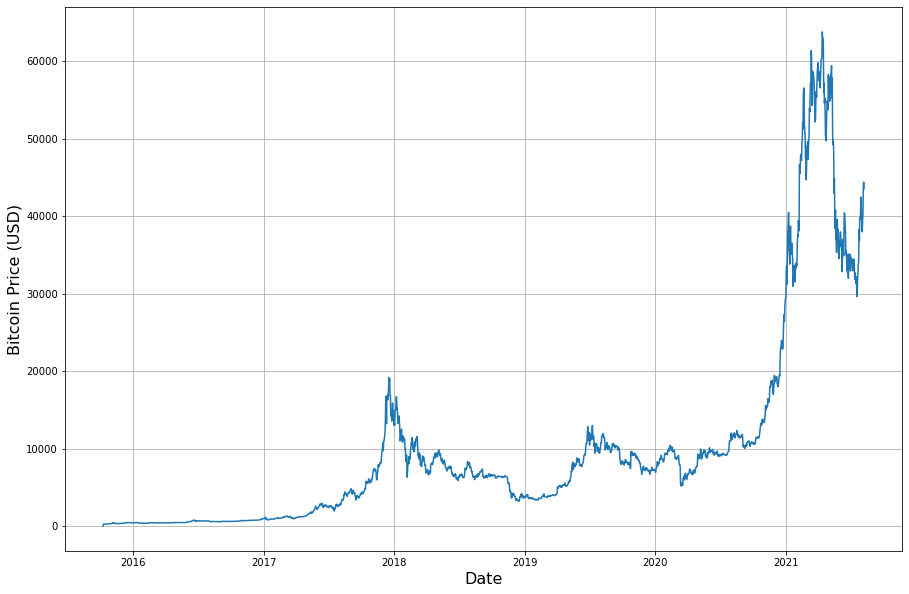

In [4]:
plt.figure(figsize = (15, 10))
plt.plot(data["Date"], data["Open"])
plt.xlabel("Date", fontsize=16)
plt.ylabel("Bitcoin Price (USD)", fontsize=16)
plt.grid(True)


In [5]:
diff = data['Open'].diff()
diff = diff.fillna(0)

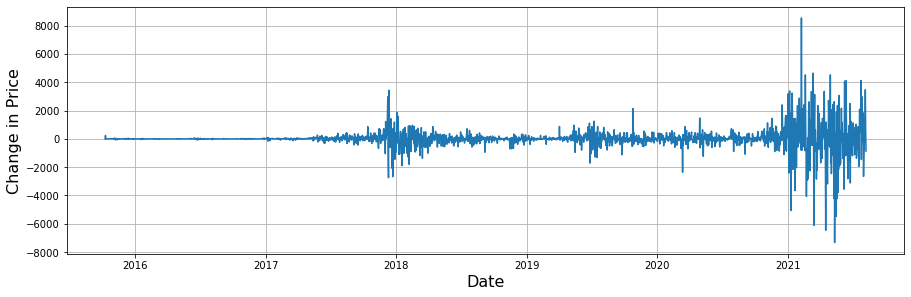

In [6]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data['Date'], diff)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Change in Price", fontsize=16)
plt.grid(True)
plt.show()


In [7]:
X = diff.values.reshape(-1, 1)
model = hmm.GaussianHMM(n_components = 3, covariance_type = "full", n_iter = 50)
model.fit(X)
Z = model.predict(X)
states = pd.unique(Z)

In [8]:
print("Unique states:")
print(states)
print("Start Probabilities:")
print(model.startprob_)
print("Transition Matrix:")
print(model.transmat_)

Unique states:
[0 2 1]
Start Probabilities:
[1.00000000e+00 3.03834083e-76 7.66819115e-17]
Transition Matrix:
[[9.61060086e-01 3.90558879e-23 3.89399145e-02]
 [1.01122615e-38 9.65696944e-01 3.43030560e-02]
 [1.81172344e-02 1.36519307e-02 9.68230835e-01]]


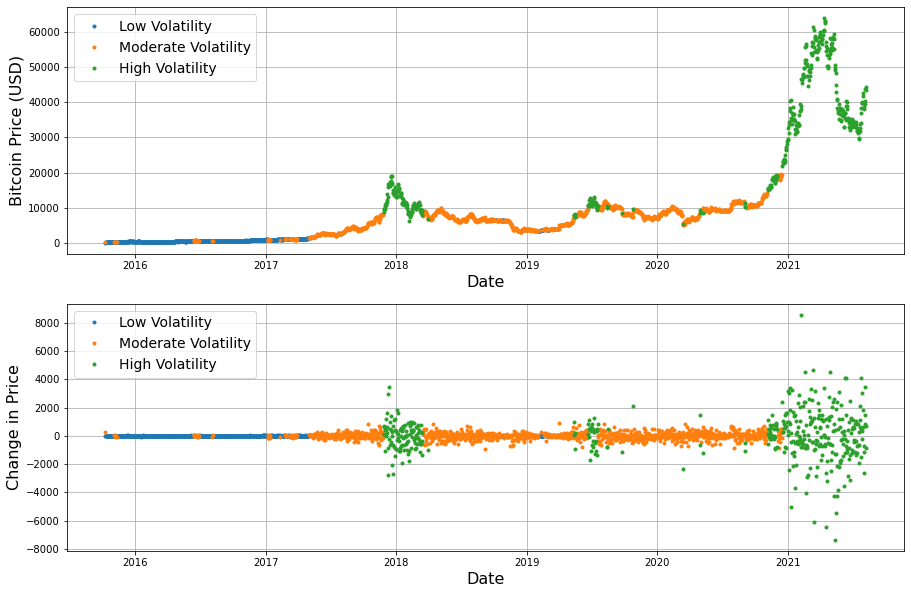

In [9]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = data["Date"].iloc[want]
    y = data["Open"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(['Low Volatility', 'Moderate Volatility', 'High Volatility'], fontsize=14)
plt.grid(True)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Bitcoin Price (USD)", fontsize=16)

plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = data["Date"].iloc[want]
    y = diff.iloc[want]
    plt.plot(x, y, '.')
plt.legend(['Low Volatility', 'Moderate Volatility', 'High Volatility'], fontsize=14)
plt.grid(True)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Change in Price", fontsize=16)
plt.show()


In [10]:
#there is little to no movement in the price from 2015-2017
#therefore start at a later date to see if this affects our Recognition Engine

In [11]:
new_date = "2017-01-01"
data2 = data[data["Date"] >=pd.to_datetime(new_date)]

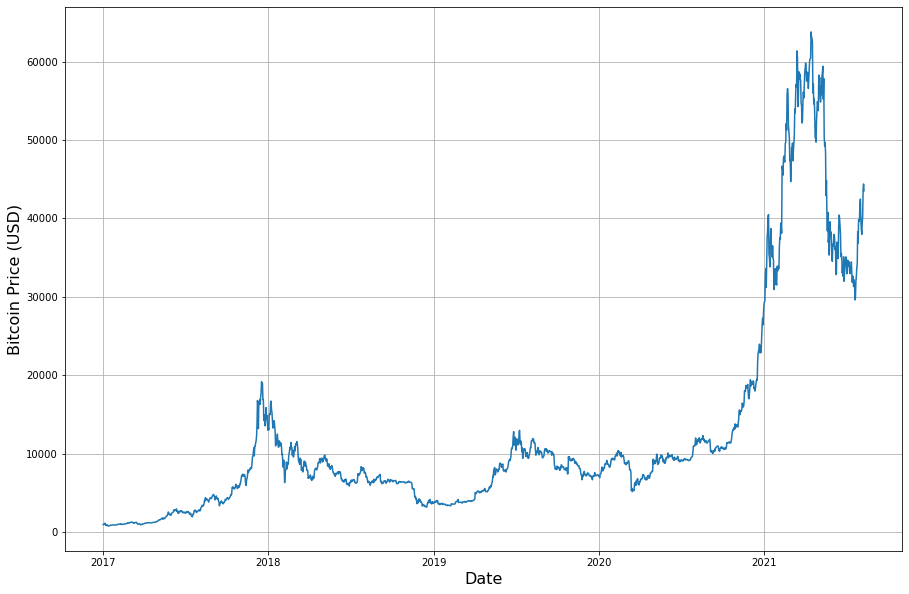

In [12]:
plt.figure(figsize = (15, 10))
plt.plot(data2["Date"], data2["Open"])
plt.xlabel("Date", fontsize=16)
plt.ylabel("Bitcoin Price (USD)", fontsize=16)
plt.grid(True)


In [13]:
diff2 = data2['Open'].diff()
diff2 = diff2.fillna(0)

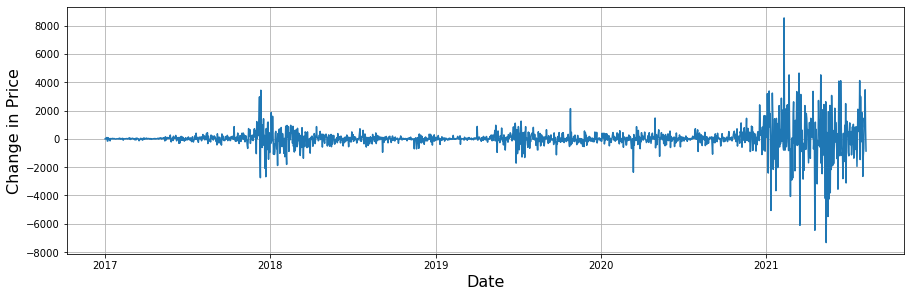

In [14]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data2['Date'], diff2)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Change in Price", fontsize=16)
plt.grid(True)
plt.show()


In [15]:
X = diff2.values.reshape(-1, 1)
model = hmm.GaussianHMM(n_components = 3, covariance_type = "full", n_iter = 50)
model.fit(X)
Z = model.predict(X)
states = pd.unique(Z)

In [16]:
print("Unique states:")
print(states)
print("Start Probabilities:")
print(model.startprob_)
print("Transition Matrix:")
print(model.transmat_)

Unique states:
[0 1 2]
Start Probabilities:
[1.00000000e+000 3.88983614e-081 3.64137034e-170]
Transition Matrix:
[[9.25697800e-01 7.43021999e-02 5.02629536e-22]
 [4.59206670e-02 9.43210732e-01 1.08686006e-02]
 [3.96605361e-22 2.06888953e-02 9.79311105e-01]]


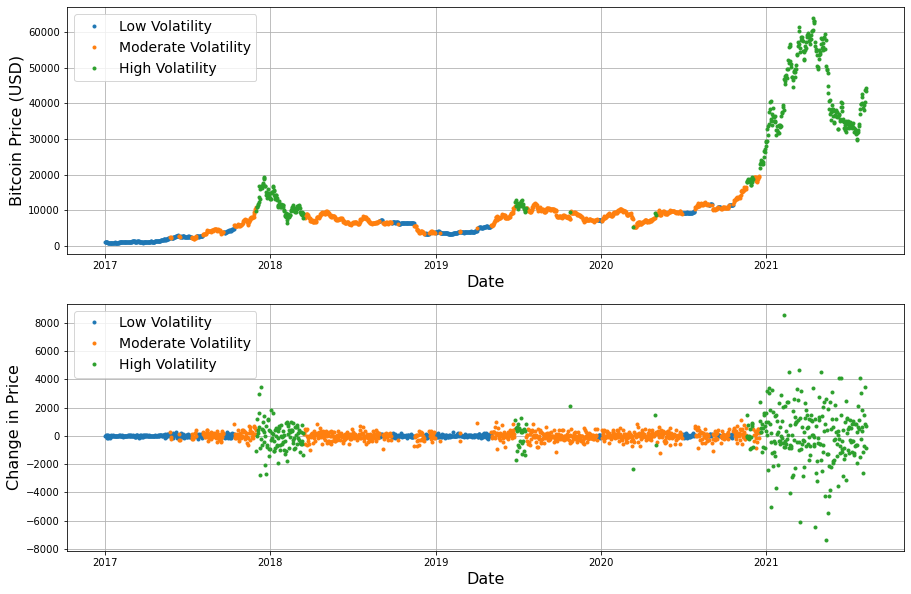

In [17]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = data2["Date"].iloc[want]
    y = data2["Open"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(['Low Volatility', 'Moderate Volatility', 'High Volatility'], fontsize=14)
plt.grid(True)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Bitcoin Price (USD)", fontsize=16)

plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = data2["Date"].iloc[want]
    y = diff2.iloc[want]
    plt.plot(x, y, '.')
plt.legend(['Low Volatility', 'Moderate Volatility', 'High Volatility'], fontsize=14)
plt.grid(True)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Change in Price", fontsize=16)
plt.show()

In [18]:
#def predictor(data)
def _extract_features(data):
    changes = []
    open_price = np.array(data['Open'])
    close_price = np.array(data['Close'])
    frac_change = (close_price - open_price) / open_price
  
    return np.column_stack((frac_change))
changes = _extract_features(data.drop(index = 0))
changes

array([[ 0.00784072,  0.00321779,  0.01088104, ...,  0.01535544,
        -0.0194182 ,  0.07178698]])

In [19]:
'''
1. create list of changes --> having trouble, only getting list of length 1
2. create list of predictions
3. graph predictions vs actuals
'''

'\n1. create list of changes --> having trouble, only getting list of length 1\n2. create list of predictions\n3. graph predictions vs actuals\n'

In [20]:
changes = np.transpose(changes)

In [21]:
np.shape(changes)

(2132, 1)

In [22]:
predictions= []

for i in range(1, len(changes)-1):
    close_price = np.array(data['Close'])
    predictions.append(close_price[i-1]*(1+changes[i]))
    i += 1

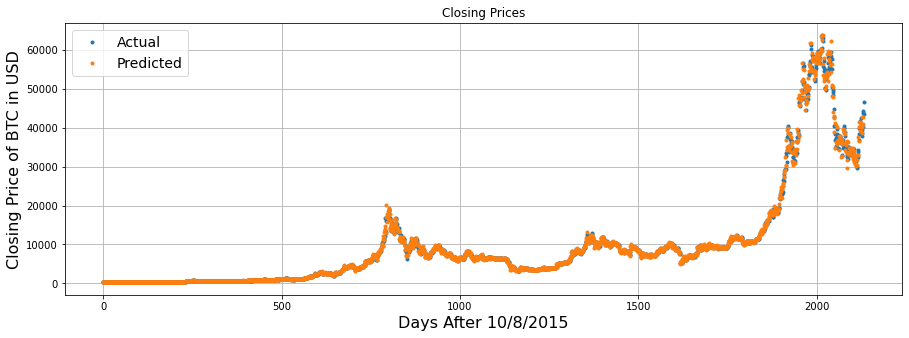

In [23]:
plt.figure(figsize = (15, 5))
plt.plot(data['Close'], '.')
plt.plot(predictions, '.')
plt.title('Closing Prices')
plt.legend(['Actual', 'Predicted'], fontsize=14)
plt.grid(True)
plt.xlabel("Days After 10/8/2015", fontsize=16)
plt.ylabel("Closing Price of BTC in USD", fontsize=16)
plt.show()

In [24]:
#451 days between 10/8/2015 and 1/1/2017
#start counting at 452
predictions2 = []

for i in range(452, len(changes)-1):
    predictions2.append(predictions[i-1])
    i += 1

In [25]:
data_short = data['Close'][452:]
data_short = data_short.reset_index()
del data_short["index"]


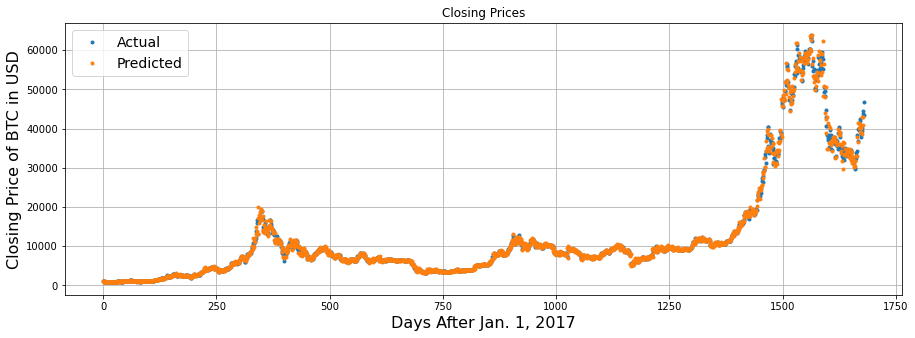

In [27]:
plt.figure(figsize = (15, 5))
plt.plot(data_short, '.')
plt.plot(predictions2, '.')
plt.title('Closing Prices')
plt.legend(['Actual', 'Predicted'], fontsize=14)
plt.grid(True)
plt.xlabel("Days After Jan. 1, 2017", fontsize=16)
plt.ylabel("Closing Price of BTC in USD", fontsize=16)
plt.show()